In [1]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys, os
sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation/')
sys.path.append('../../')
import hts_fitting as hts
import hts_fitfunctions as ff
import default_style as dfs


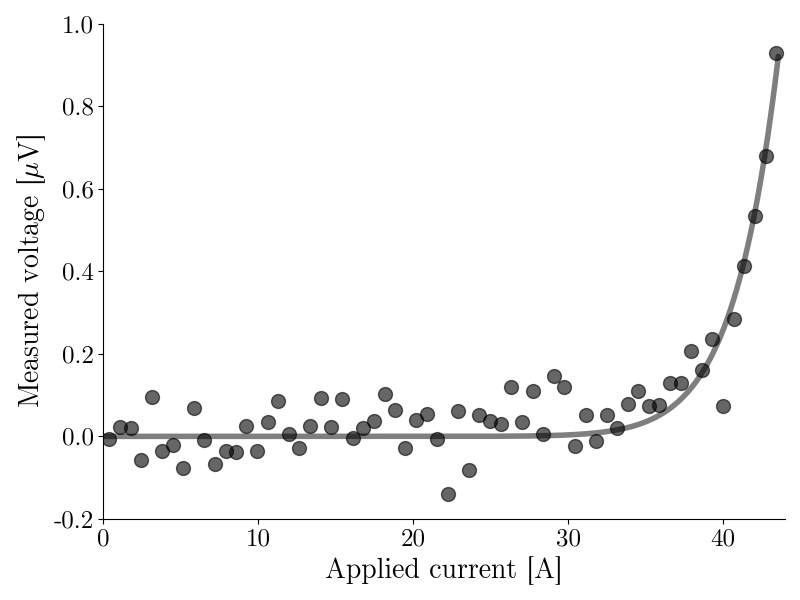

In [2]:
file_pristine = '../data/T_30_B_15T_f_0e22.dat'
file_irradiated = '../data/T_30_B_15T_f_4e22.dat'

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel(r'Applied current [A]')
ax.set_ylabel(r'Measured voltage [$\mu$V]')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0, 60, 10))
ax.set_xlim(0, 44)
ax.set_ylim(-.2, 1)

for file, c, imax in zip([file_pristine, file_irradiated], ['k', 'r'], [43.57]):#, 21.90]):
    data = hts.readIV(file, fformat='tuv')
    data['voltage'] -= data['voltage'].iloc[:10].mean()
    
    popt, pcov, chisq = hts.fitIV(data.current, data.voltage, vc=.25e-6, p0=[42, 40], function='powerLaw')
    xsmooth = np.linspace(0, imax, 1000)
    ysmooth = ff.powerLaw(xsmooth, *popt)
    
    ax.plot(data.current, 1e6*data.voltage, marker='o', color=c, linestyle='None', alpha=.6)
    ax.plot(xsmooth, 1e6*ysmooth, linewidth=4, color=c, alpha=.5, solid_capstyle='round')

fig.tight_layout()
plt.savefig('ivs-0e22.png', format='png', transparent=True)

In [3]:
path = '../data/'
fpaths = [path+f for f in np.sort(os.listdir(path)) if 'T_' in f]
fluence = np.array([0, 1, 2, 3, 4])*4/3

for i, file in enumerate(fpaths):

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    
    ax[1].set_xlabel(r'Applied current [A]')
    ax[1].set_ylabel(r'Measured voltage [$\mu$V]')
    ax[0].set_xlabel(r'Neutron dose [mdpa]')
    ax[0].set_ylabel(r'$\mathrm{I_c \, / \, I_c^{unirradiated}\; [A]}$')
    
    ax[1].set_xticks(np.arange(0, 100, 10))
    ax[1].set_xlim(0, 82)
    ax[0].set_xlim(0, 6)
    ax[1].set_ylim(-.2, 1.25)
    ax[0].set_ylim(0, 1.8)

    ic = []
    for f, imax, correct in zip(fpaths[:i+1], [44.5, 67, 78, 43.5, 22.5], [True, True, True, True, False]):
        print(f)
        
        data = pd.read_csv(f, sep=r'\s+', names=['current', 'voltage'], skipfooter=2, engine='python')
        if data.voltage.iloc[data.voltage.abs().argmax()] < 0:
            data['voltage'] *= -1
        if correct:
            data['voltage'] = hts.correctBackground(data.current, data.voltage, vc=.2e-6, vb=False)
    
        positive = (data.voltage >= 0) & (data.current >= 0)
        current, voltage = data.current[positive], data.voltage[positive]
    
        popt, pcov, chisq = hts.fitIV(current, voltage, vc=.2e-6, function='powerLaw')
        xsmooth = np.linspace(0, imax, 1000)
        ysmooth = 1e6*ff.powerLaw(xsmooth, *popt)
        ic.append(popt[0])
        if f == file:
            c = 'r'
        else:
            c = 'k'
        ax[1].plot(xsmooth, ysmooth, linewidth=4, color=c, alpha=.5, solid_capstyle='round')
        ax[1].plot(data.current.values, data.voltage.values*1e6, linestyle='None', marker='o', color=c, alpha=.6)

    ax[0].plot(fluence[:i+1], np.array(ic)/ic[0], marker='o', color='k', alpha=.6, linestyle='--', linewidth=.5)
    ax[0].plot(fluence[i], np.array(ic)[i]/ic[0], marker='o', color='r', alpha=1, linestyle='--', linewidth=.5)
    fig.tight_layout()
    fig.savefig('ivs-{}.png'.format(i), format='png', dpi=300, transparent=True)
    plt.close(fig)

../data/T_30_B_15T_f_0e22.dat
../data/T_30_B_15T_f_0e22.dat
../data/T_30_B_15T_f_1e22.dat
../data/T_30_B_15T_f_0e22.dat
../data/T_30_B_15T_f_1e22.dat
../data/T_30_B_15T_f_2e22.dat
../data/T_30_B_15T_f_0e22.dat
../data/T_30_B_15T_f_1e22.dat
../data/T_30_B_15T_f_2e22.dat
../data/T_30_B_15T_f_3e22.dat
../data/T_30_B_15T_f_0e22.dat
../data/T_30_B_15T_f_1e22.dat
../data/T_30_B_15T_f_2e22.dat
../data/T_30_B_15T_f_3e22.dat
../data/T_30_B_15T_f_4e22.dat
